● Sayama Exercise 16.14 on page 353. Revise the small­world network formation model
above so that the network is initially a two­dimensional grid in which each node is
connected to its four neighbors. (north, south, east, and west; except for those on the
boundaries of the space). Then run the simulations, and see how random edge rewiring
changes the topology of the network.

In [5]:
import matplotlib
#matplotlib.use('TkAgg')
from pylab import *
import networkx as nx
import random as rd

n = 30 # number of nodes
k = 4 # number of neighbors of each node

def initialize():
    global g
    g = nx.Graph()
    for i in range(n):
        for j in range(1, k // 2 + 1):
            g.add_edge(i, (i + j) % n)
            g.add_edge(i, (i - j) % n)
    g.pos = nx.spring_layout(g)
    g.count = 0
    
def initialize_grid():
    global g
    #Make a 5x6 grid -> has 30 nodes
    #Each node is connected to its four neighbours
    g = nx.grid_graph(dim=[5, 6])
    g.pos = nx.spring_layout(g)
    g.count = 0

def observe():
    global g
    #cla()
    nx.draw(g, pos = g.pos)
    plt.show() #To ensure that graphs are visualized immediately

def update():
    global g
    g.count += 1
    if g.count % 20 == 0: # rewiring once in every 20 steps
        nds = list(g.nodes)
        i = rd.choice(nds)
        if g.degree[i] > 0:
            g.remove_edge(i, rd.choice(list(g.neighbors(i))))
            nds.remove(i)
            for j in g.neighbors(i):
                nds.remove(j)
            g.add_edge(i, rd.choice(nds))

    # simulation of node movement
    g.pos = nx.spring_layout(g, pos = g.pos, iterations = 5)

#import pycxsimulator
#pycxsimulator.GUI().start(func=[initialize, observe, update])

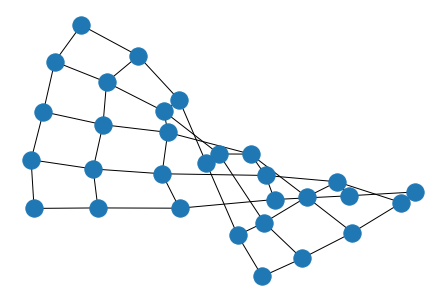

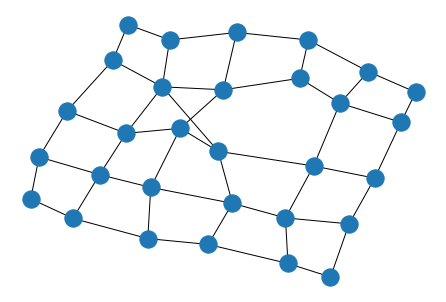

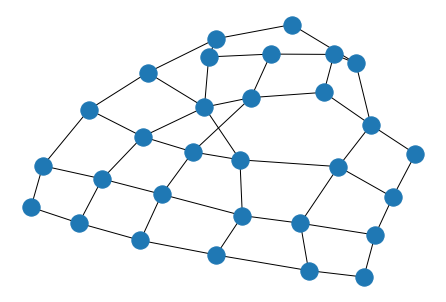

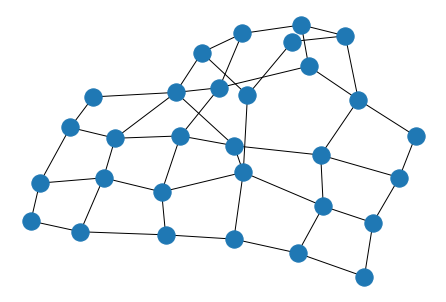

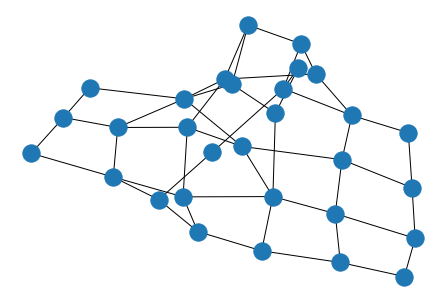

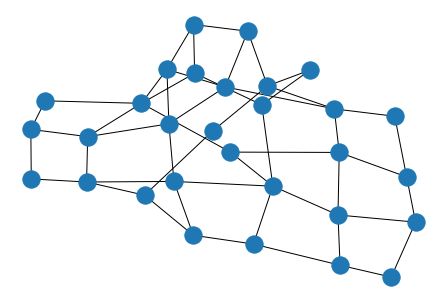

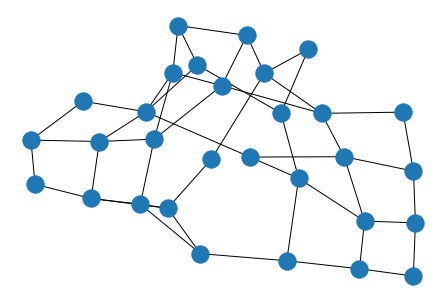

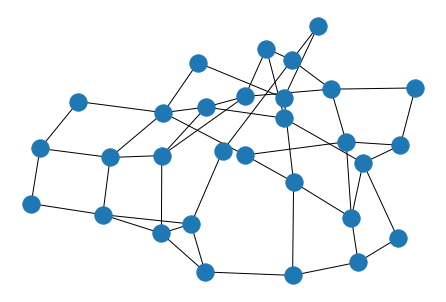

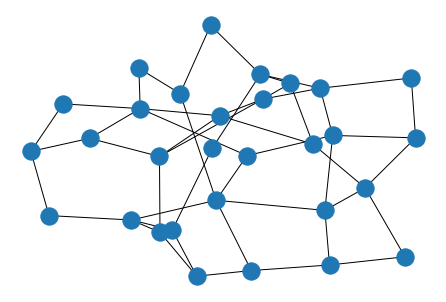

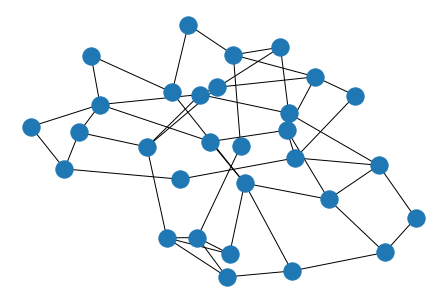

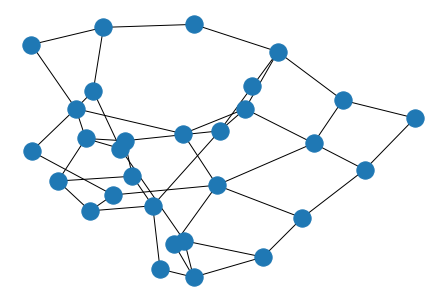

In [6]:
initialize_grid()
for i in range(201):
    update()
    if i % 20 == 0: #Visualizing network every 20 timesteps
        observe()

We can see that the network starts out as a perfect 2 dimensional grid (although the visualization is curved in the 2d space). It then gradually looses its structure, approaching a random network, as edges are randomly reasigned.

# Sayama Exercise 16.15 on page 359. 
Simulate the Barabási­Albert network growth model with m  = 1 , m  = 3 , and m  = 5 , and see how the growth process may be affected by the variation of this parameter.

In [15]:
#Code from Sayama p.357
m0 = 5 # number of nodes in initial condition
#m = 2 number of edges per new node

def initialize():
    global g
    g = nx.complete_graph(m0)
    g.pos = nx.spring_layout(g)
    g.count = 0

def observe():
    global g
    #cla()
    nx.draw(g, pos = g.pos)
    plt.show()
    
def pref_select(nds):
    global g
    r = uniform(0, sum(g.degree(i) for i in nds))
    x=0
    for i in nds:
        x += g.degree[i]
        if r <= x:
            return i

def update(m):
    global g
    g.count += 1
    if g.count % 20 == 0: # network growth once in every 20 steps
        nds = list(g.nodes)
        newcomer = max(nds) + 1
        for i in range(m):
            j = pref_select(nds)
            g.add_edge(newcomer, j)
            nds.remove(j)
        g.pos[newcomer] = (0, 0)

    # simulation of node movement
    g.pos = nx.spring_layout(g, pos = g.pos, iterations = 5)

In [18]:
def Barabási_Albert(m):
    initialize()
    for i in range(201):
        update(m)
        if i % 50 == 0: #Visualizing network every 20 timesteps
            observe()

# Running with m=1

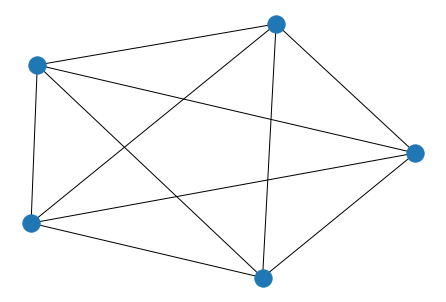

/Users/oscarengelbrektson/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:19: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.


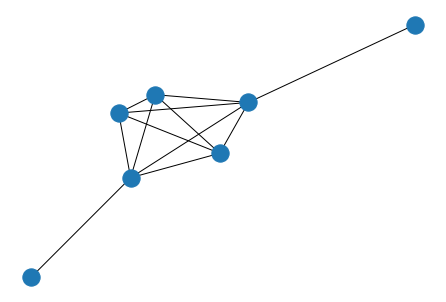

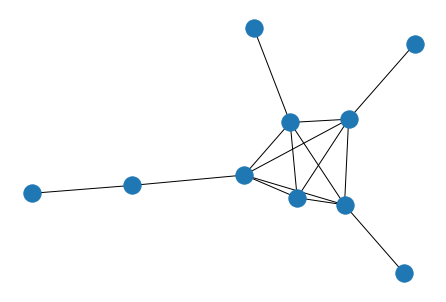

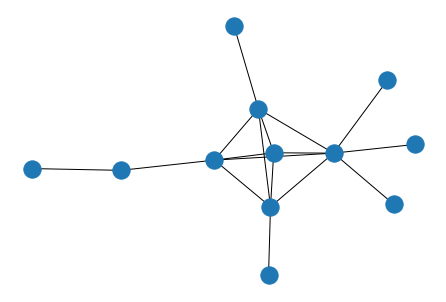

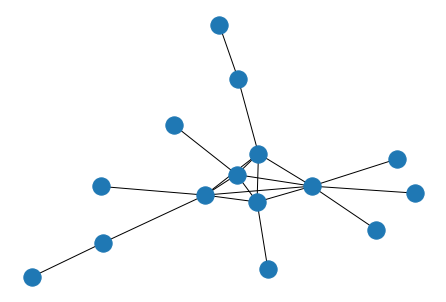

In [19]:
Barabási_Albert(1)

# M=3

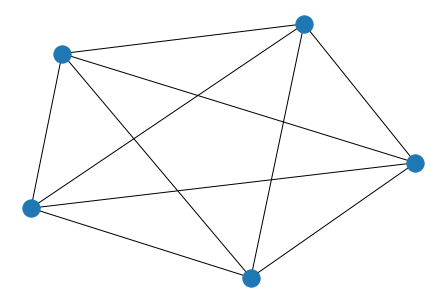

/Users/oscarengelbrektson/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:19: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.


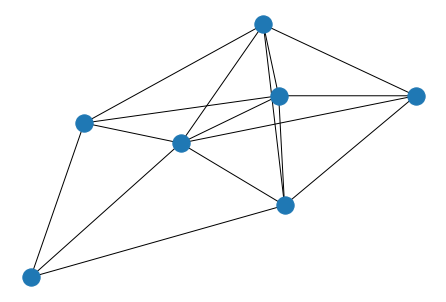

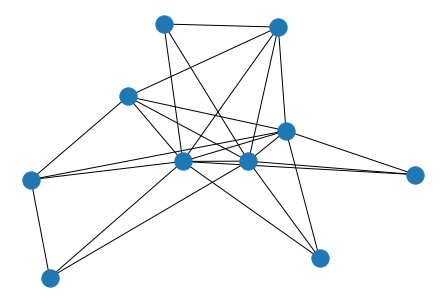

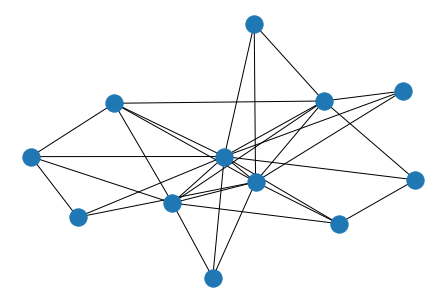

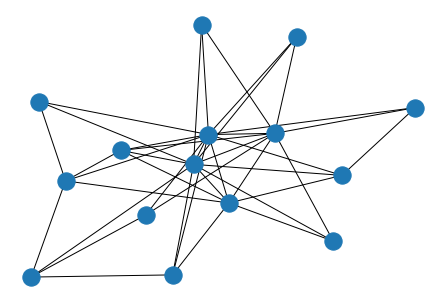

In [20]:
Barabási_Albert(3)

# M=5

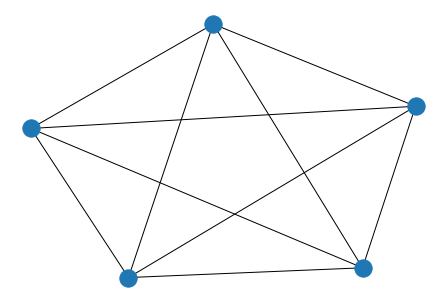

/Users/oscarengelbrektson/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:19: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.


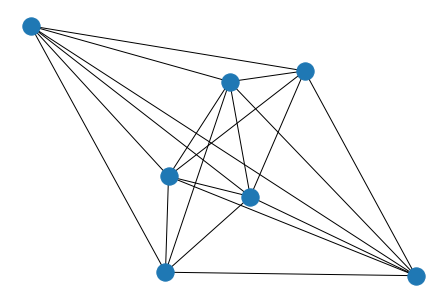

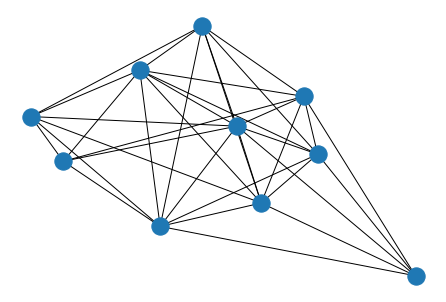

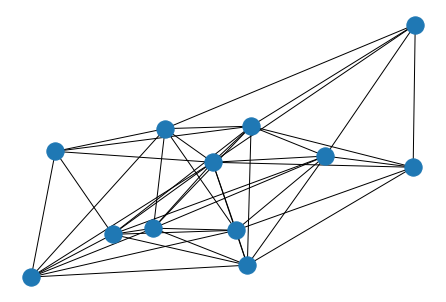

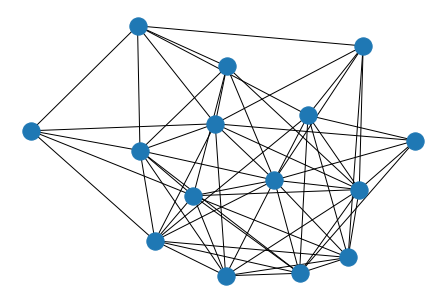

In [21]:
Barabási_Albert(5)

As new nodes are added, the connectedness of the graph increases. The bias towards creating edges to nodes with high degree, resulting in see the development of few highly connected nodes. This is true in all three cases. However, as there cannot be more than one edge connecting a two nodes, a high m relative to m0 means that there will be fewer low degree nodes, at least in the beginning (low number of total steps) of the simulation. For example, we can see that on the last simulation where m=m0=5 the first new node must have edges to all 5 preexisting nodes. This leads to larger clusters in the medium term, as the five initial nodes are likely to develop high degree in the early stages of the simulation.

[0 1 2 3 4 1 0 1 2 3 2 1 0 1 2 3 2 1 0 1 4 3 2 1 0]


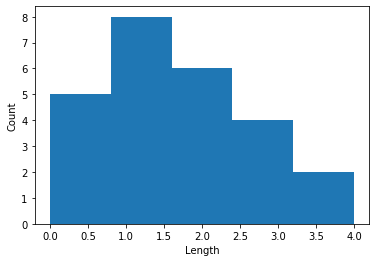

In [44]:
G = nx.path_graph(5)

def plot_pairwise_shortest_path_distance(G):
    
    path = dict(nx.all_pairs_shortest_path(G))
    
    path_lengths = np.array([[len(path[x][y])-1 for x in range(len(path))] for y in range(len(path))]).flatten()

    plt.hist(path_lengths, bins=max(path_lengths)+1)
    
    plt.ylabel("Count")
    plt.xlabel("Length")
    plt.show()
    
plot_pairwise_shortest_path_distance(G)